# Nonparametric Statistics: Spearman's rank correlation coefficient

The Spearman correlation coefficient $r_s$ is defined as the Pearson correlation coefficient between the ranked variables $\operatorname{rg}_X,\operatorname{rg}_Y$

$r_s = \rho_{\operatorname{rg}_X,\operatorname{rg}_Y} = \frac {\operatorname{cov}(\operatorname{rg}_X,\operatorname{rg}_Y)} { \sigma_{\operatorname{rg}_X} \sigma_{\operatorname{rg}_Y} }$

where
* $\rho$ denotes the usual Pearson correlation coefficient, but applied to the rank variables.
* $\operatorname{cov}(\operatorname{rg}_X, \operatorname{rg}_Y)$ is the covariance of the rank variables.
* $\sigma_{\operatorname{rg}_X}$ and $\sigma_{\operatorname{rg}_Y}$ are the standard deviations of the rank variables.

This can be computed with SciPy stats with 

`scipy.stats.spearmanr(X, Y)`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

## Assumptions

* Both variables should be independent, identically distributed.
* One variable is monotonically related to the other variable.
* Data is at least ordinal.

<img src="images/spearman-1.png">

## Method

If all $n$ ranks are distinct, it can be computed using the formula

$ r_s = {1- \frac {6 \sum d_i^2}{n(n^2 - 1)}}.$

$\sigma_{\operatorname{rg}_X} \sigma_{\operatorname{rg}_Y} = \operatorname{Var}{\operatorname{rg}_X} = \operatorname{Var}{\operatorname{rg}_Y} = n(n^2 - 1)/6$

where $d_i = \operatorname{rg}(X_i) - \operatorname{rg}(Y_i)$, is the difference between the two ranks of each observation, and $n$ is the number of observations.

The standard error of the coefficient is

$ \sigma_{r_s} = \frac{ 0.6325 }{ \sqrt{n-1} } $

A perfect Spearman correlation ($r_s = 1$ or $-1$) is when $X$ and $Y$ are related by any monotonic function, instead of merely a linear function.

The Spearman correlation is nonparametric because its sampling distribution can be obtained without requiring knowledge of the joint probability distribution of $X$ and $Y$.

## Significance testing

The statistic $t = r_s \sqrt{\frac{n-2}{1-r_s^2}}$ is distributed approximately as Student's $t$ distribution with $n-2$ degrees of freedom under the null hypothesis.

## Example

Calculate the correlation between the IQ of a person with the number of hours spent in front of TV per week.


| IQ  | Hours of TV/week |
|----:|-----------------:|
| 106 | 7                |
|  86 | 0                |
| 100 | 27               |
| 101 | 50               |
|  99 | 28               |
| 103 | 29               |
|  97 | 20               |
| 113 | 12               |
| 112 | 6                |
| 110 | 17               |

In [1]:
import scipy.stats
import numpy as np

X = [106, 86, 100, 101, 99, 103, 97, 113, 112, 110]
Y = [7, 0, 27, 50, 28, 29, 20, 12, 6, 17]

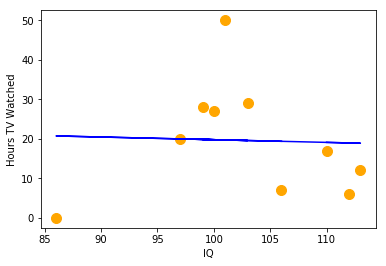

corr_coeff =  -0.0376014738469


In [2]:
import matplotlib.pyplot as plt

plt.plot(X,Y,'.', markersize=20, c=(1,0.65,0))
plt.xlabel('IQ')
plt.ylabel('Hours TV Watched')

fit = np.polyfit(X, Y, deg=1)
plt.plot(X, fit[0] * np.array(X) + fit[1], color='blue')

corr_coeff = np.corrcoef(X,Y)[0,1]

plt.show()

print('corr_coeff = ', corr_coeff)

In [3]:
# Option 1: SciPy stats
result = scipy.stats.spearmanr(X, Y)
print('    rho = ', result.correlation)
print('p-value = ', result.pvalue)

    rho =  -0.175757575758
p-value =  0.627188344776


In [4]:
# Option 2: By hand...
n = len(X)

# Sort the data by the first column ($X_i$), assign it the ranked values $1,2,3,\dots n$.
rX = scipy.stats.rankdata(X)

# Sort the data by the second column ($Y_i$), and assign it the ranked values $1,2,3,\dots n$.
rY = scipy.stats.rankdata(Y)

# Form the differences $d_i$ between the two rank columns.
d = np.array(rX - rY)
d_squared = np.dot(d , d)
rho = 1 - 6*d_squared / (n*(n**2-1))

print('ranks(X) = ', rX)
print('ranks(Y) = ', rY)
print('       d = ', rX - rY)
print('     rho = ', rho)

# Sigificance testing...
df = n - 2
t = rho * np.sqrt( (n-2)/(1-rho**2) )

# Two-tailed probability that we see a value this large or larger (symmetric)
p = 2 * (1 - scipy.stats.t.cdf(np.abs(t), n-2))

print('t statistic, 8 d.o.f. = ', t)
print('              p-value = ', p)

ranks(X) =  [  7.   1.   4.   5.   3.   6.   2.  10.   9.   8.]
ranks(Y) =  [  3.   1.   7.  10.   8.   9.   6.   4.   2.   5.]
       d =  [ 4.  0. -3. -5. -5. -3. -4.  6.  7.  3.]
     rho =  -0.175757575758
t statistic, 8 d.o.f. =  -0.504978249176
              p-value =  0.627188344776


The correlation between IQ and hours spent watching TV, -0.175, is very low, although negative.

The p-value is 0.627188, so there is not much evidence of a statistically significant relationship between IQ and hour watching TV (Phew).